In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
filepath = r'D:\Project\jupyter\machinelearning\watermelon.csv'

In [ ]:
# print(df.values.shape)
# # n
# print(type(df),type(df['norm'].values))
# print(type(df[['norm','density','ratio_suger']].values))
# print(dataMat, type(dataMat),type(dataMat[0][0]))
# print(df['label'].values[:] == df['label'].values)
# #print(np.mat(df['label'].values[:]).transpose(), type(labelMat))

In [2]:
#df = pd.read_csv(filepath,encoding = 'gb18030')
df = pd.read_csv('watermelon.csv')
#print(df['label'])
m,n=np.shape(df.values)  
df['norm']=np.ones((m,1)) 
#print(df['norm'])
dataMat=np.array(df[['norm','density','ratio_suger']].values[:,:])  
labelMat=np.mat(df['label'].values[:]).transpose() 
#print(labelMat)

In [47]:
#sigmoid函数  
def sigmoid(inX):  
    return 1.0/(1+np.exp(-inX))  
  
#梯度上升算法  
def gradAscent(dataMat,labelMat):  
    m,n=np.shape(dataMat)
    #print(dataMat)
    #print(m,n)
    alpha=0.1  
    maxCycles=500  
    weights=np.array(np.ones((n,1)))
    print(weights)
  
    for k in range(maxCycles):   
        a=np.dot(dataMat,weights)  
        h=sigmoid(a) 
        if k == 0:
            print(h)
        error=(labelMat-h)  
        weights=weights+alpha*np.dot(dataMat.transpose(),error)  
    return weights  
  
#随机梯度上升  
def randomgradAscent(dataMat,label,numIter=50):  
    m,n=np.shape(dataMat)  
    weights=np.ones(n)
    print(weights)
    for j in range(numIter):  
        dataIndex=list(range(m))  
        for i in range(m):  
            alpha=40/(1.0+j+i)+0.2  
  
            randIndex_Index=int(np.random.uniform(0,len(dataIndex)))  
            randIndex=dataIndex[randIndex_Index]  
            #h=sigmoid(sum(np.dot(dataMat[randIndex],weights)))  
            h=sigmoid(np.dot(dataMat[randIndex],weights))
            if i== 0 and j == 0:
                print(h)
            error=(label[randIndex]-h)  
            weights=weights+alpha*error[0,0]*(dataMat[randIndex].transpose()) 
            #print(type(dataIndex))
            del(dataIndex[randIndex_Index])  
    return weights  


In [51]:
#画图  
def plotBestFit(weights):  
    m=np.shape(dataMat)[0]  
    xcord1=[]  
    ycord1=[]  
    xcord2=[]  
    ycord2=[]  
    for i in range(m):  
        if labelMat[i]==1:  
            xcord1.append(dataMat[i,1])  
            ycord1.append(dataMat[i,2])  
        else:  
            xcord2.append(dataMat[i,1])  
            ycord2.append(dataMat[i,2])  
    plt.figure(1)  
    ax=plt.subplot(111)  
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')  
    ax.scatter(xcord2,ycord2,s=30,c='green')  
    x=np.arange(0.2,0.8,0.1)  
    y=np.array((-weights[0]-weights[1]*x)/weights[2])   # 不明白为什么要y为0
    #print(np.shape(x), x)  
    #print(np.shape(y), y)  
    plt.sca(ax)  
    plt.plot(x,y)      #ramdomgradAscent  
    #plt.plot(x,y[0])   #gradAscent  
    plt.xlabel('density')  
    plt.ylabel('ratio_sugar')  
    #plt.title('gradAscent logistic regression')  
    plt.title('ramdom gradAscent logistic regression')  
    plt.show()  


[1. 1. 1.]
0.8087641718453525


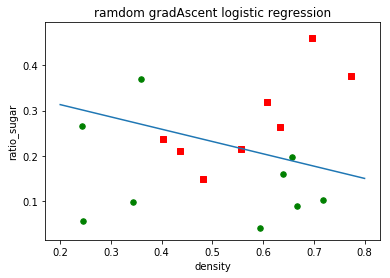

In [52]:
#weights=gradAscent(dataMat,labelMat)  
weights=randomgradAscent(dataMat,labelMat)  
plotBestFit(weights)  